In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [2]:
# path to csv files
files = [i for i in glob.glob('/Users/jeremytan/Desktop/youtube_files/input/*.{}'.format('csv'))]
sorted(files)

['/Users/jeremytan/Desktop/youtube_files/input/CAvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/DEvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/FRvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/GBvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/INvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/JPvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/KRvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/MXvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/RUvideos.csv',
 '/Users/jeremytan/Desktop/youtube_files/input/USvideos.csv']

In [3]:
# make dataframes for each csv files 
big_df = list()

for csv in files:
    # use encoding to bypass utf error
    df = pd.read_csv(csv, index_col='video_id', encoding='ISO-8859-1')
    # add new column called "country" to indentify which videos the csv are coming from
    # depending on your path name, this will break as it looks at the path name 
    df['country'] = csv[45:47]
    big_df.append(df)


videos = pd.concat(big_df)
videos.head()
# videos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX
hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [4]:
# reformat trending_date
videos['trending_date'] = pd.to_datetime(videos['trending_date'],errors='coerce', format='%y.%d.%m')
videos['publish_time'] = pd.to_datetime(videos['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

# detects any nans 
videos = videos[videos['trending_date'].notnull()]
videos = videos[videos['publish_time'].notnull()]

# drop all nans by trmeoving them 
videos = videos.dropna(how='any',inplace=False, axis = 0)

# this is done already
videos.insert(4, 'publish_date', videos['publish_time'].dt.date)
videos['publish_time'] = videos['publish_time'].dt.time

# set index by video id and sort by trending dates 
videos_fill = videos.reset_index().sort_values('trending_date').set_index('video_id')
# set index by vide id and sort by trending dates, but make sure to drop duplicates
videos = videos.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
# videos[['publish_date','publish_time']].head()
videos.head()

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
ymGzEGUwt2A,2017-11-14,ÐÐÐ 2 ÐÐÐÐÐ¡Ð¢Ð ÑÐ°Ð½ÑÑÐµ ÑÑÐ¸ÑÐ...,ÐÐ¾Ð¼ 2 Ñ ÐÐ»Ð¾ÑÐ¸ÐµÐ¹ Ð Ð°Ð¹,22,2017-11-13,16:42:03,"Ð´Ð¾Ð¼ 2|""Ð´Ð¾Ð¼ 2 Ð½Ð¾Ð²Ð¾ÑÑÐ¸""|""Ð±ÑÐ·Ð¾Ð²...",18445,100,36,9,https://i.ytimg.com/vi/ymGzEGUwt2A/default.jpg,False,False,False,ÐÐ¾Ð¼ 2 Ð½Ð¾Ð²Ð¾ÑÑÐ¸ Ð¸ ÑÐ»ÑÑ Ð¸ Ð½Ð° 14 ...,RU
SY4jqRXezb8,2017-11-14,Viva la RÃ©volution!,ARTPODGOTOVKA,25,2017-11-13,20:06:09,"Ð²ÑÑÐµÑÐ»Ð°Ð²|""Ð¼Ð°Ð»ÑÑÐµÐ²""|""Ð¿Ð»Ð¾Ñ Ð¸Ð...",43489,3570,1732,269,https://i.ytimg.com/vi/SY4jqRXezb8/default.jpg,False,False,False,ÐÐÐÐÐÐÐÐÐ Ð ÐÐÐ ÐÐÐ£: https://ww...,RU
Ir1nX_gLnls,2017-11-14,ÐÐ³ÑÐ¾Ð¼Ð½Ð°Ñ Ð·Ð°Ð±ÑÐ¾ÑÐµÐ½Ð½Ð°Ñ ÑÐ¿Ðµ...,ÐÐ¾ÐºÐ¸Ð½ÑÑÑÐ¹ ÐÐ¸Ñ,19,2017-11-12,15:21:18,"Ð·Ð°Ð±ÑÐ¾ÑÐµÐ½Ð½ÑÐµ Ð¼ÐµÑÑÐ°|""Ð·Ð°Ð±ÑÐ¾Ñ...",102656,7928,137,1446,https://i.ytimg.com/vi/Ir1nX_gLnls/default.jpg,False,False,False,ÐÐ°Ð±ÑÐ¾ÑÐµÐ½Ð½Ð°Ñ ÑÐºÐ¾Ð»Ð° Ð´Ð»Ñ Ð¿ÑÐ...,RU
I08JZlzwVVk,2017-11-14,ÐÐÐ¡Ð¡ ÐÐ ÐÐÐÐÐ777,RED ÐÐ¸Ð½Ð³Ð²Ð¸Ð½,22,2017-11-11,06:50:10,"Ð°Ð·Ð¸Ð½Ð¾ 777|""azino777""|""redpingwin""|""red""|""...",308186,3405,9672,713,https://i.ytimg.com/vi/I08JZlzwVVk/default.jpg,False,False,False,ÐÐµÑÐ½ÑÐ¹ Ð´Ð¾ÑÑÑÐ¿ Ð½Ð° RED ÐÐ¸Ð½Ð³Ð²Ð...,RU
uv16hVDkOEQ,2017-11-14,Ð§Ð¢Ð Ð¯ Ð£ÐÐ ÐÐ Ð Ð¨ÐÐÐ¥ÐÐ,Ð ÐÐÐ,20,2017-11-13,13:49:07,"ÑÐ°Ð¹Ð·|""starladder shanghai""|""ÐºÑÐ³Ð¾""|""CS:...",86058,9600,319,640,https://i.ytimg.com/vi/uv16hVDkOEQ/default.jpg,False,False,False,Starladder Ð² Ð¨Ð°Ð½Ñ Ð°Ðµ Ð·Ð°ÐºÐ¾Ð½ÑÐ¸Ð»ÑÑ...,RU


In [5]:
new = pd.DataFrame(videos_fill.groupby([videos_fill.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
new.head(), new.tail()

(  video_id country  title
 0   #NAME?      RU    524
 1   #NAME?      IN    508
 2   #NAME?      MX    447
 3   #NAME?      KR    404
 4   #NAME?      JP    259,            video_id country  title
 193300  aLgUO4E9njs      RU      1
 193301  aLenDddpzaM      MX      1
 193302  aLbLa453FUk      DE      1
 193303  aLaE3vil0DU      CA      1
 193304  V6xCi8ePL9w      MX      1)

In [6]:
video_list,max_list = list(),list()
country_list = videos.groupby(['country']).count().index

print(country_list)

Index(['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'], dtype='object', name='country')


In [7]:
# use .describe()
# make some plots 
# use csv files individually 

file_name = '/Users/jeremytan/Desktop/youtube_files/input/USvideos.csv' # change this if you want to read a different dataset
us = pd.read_csv(file_name, index_col='video_id')
us.head()
#us.describe()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
us['trending_date'] = pd.to_datetime(us['trending_date'], format='%y.%d.%m')
us['trending_date'].head()
us.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
us['publish_time'] = pd.to_datetime(us['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us['publish_time'].head()
# distnction from publish date and piblish time
us.insert(4, 'publish_date', us['publish_time'].dt.date)
us['publish_time'] = us['publish_time'].dt.time
us[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17:13:01
1ZAPwfrtAFY,2017-11-13,07:30:00
5qpjK5DgCt4,2017-11-12,19:05:24
puqaWrEC7tY,2017-11-13,11:00:04
d380meD0W0M,2017-11-12,18:01:41


In [10]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    us[column] = us[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    us[column] = us[column].astype(str)
us.head()    

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [11]:
# add a category column using the category id from the json file
id_to_category = {}

with open('/Users/jeremytan/Desktop/youtube_files/input/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [1]:
us.insert(4, 'category', us['category_id'].map(id_to_category))
us.head()

NameError: name 'us' is not defined

In [13]:
# grabs the "most" from views, dislikes, likes, and comment counts
def visualize_most(my_df, column, num=10): 
    # sort df by column
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    # make a bar plot
    ax = sorted_df[column].plot.bar()

    # now add the video names 
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + " ...")
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    plt.show()
    
    

In [14]:
print(us.shape)
us = us[~us.index.duplicated(keep='last')]
print(us.shape)
us.index.duplicated().any()

(40949, 17)
(6351, 17)


False

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from c

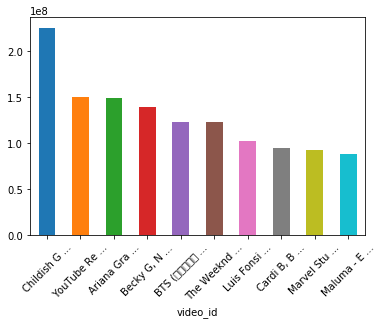

In [15]:
visualize_most(us, "views")

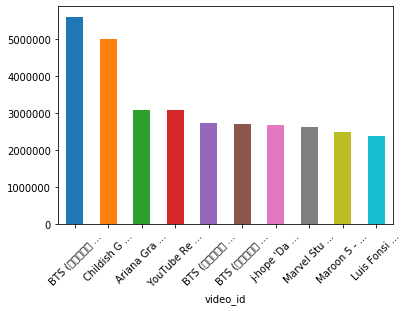

In [16]:
visualize_most(us, "likes")

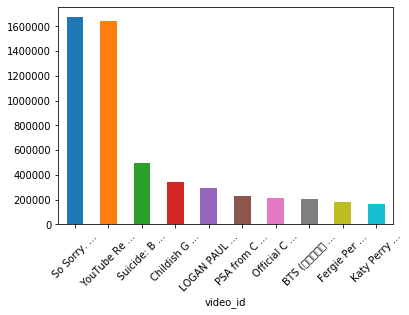

In [17]:
visualize_most(us, "dislikes")

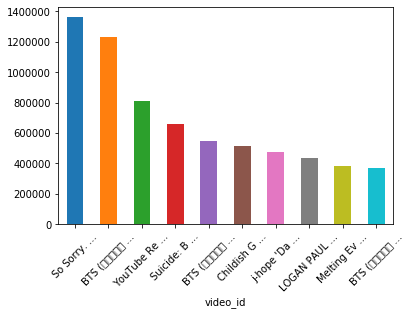

In [18]:
visualize_most(us, 'comment_count')

In [19]:
category_count = us['category'].value_counts()
category_count

Entertainment            1621
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           504
People & Blogs            495
Sports                    449
Science & Technology      381
Film & Animation          320
Education                 251
Pets & Animals            140
Gaming                    103
Autos & Vehicles           71
Travel & Events            59
Nonprofits & Activism      14
Shows                       4
Name: category, dtype: int64

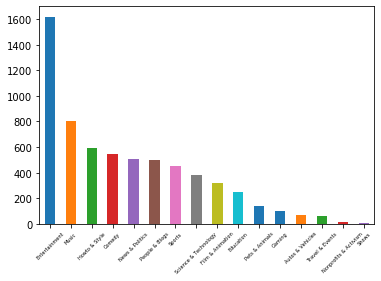

In [20]:
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=5)
plt.show()

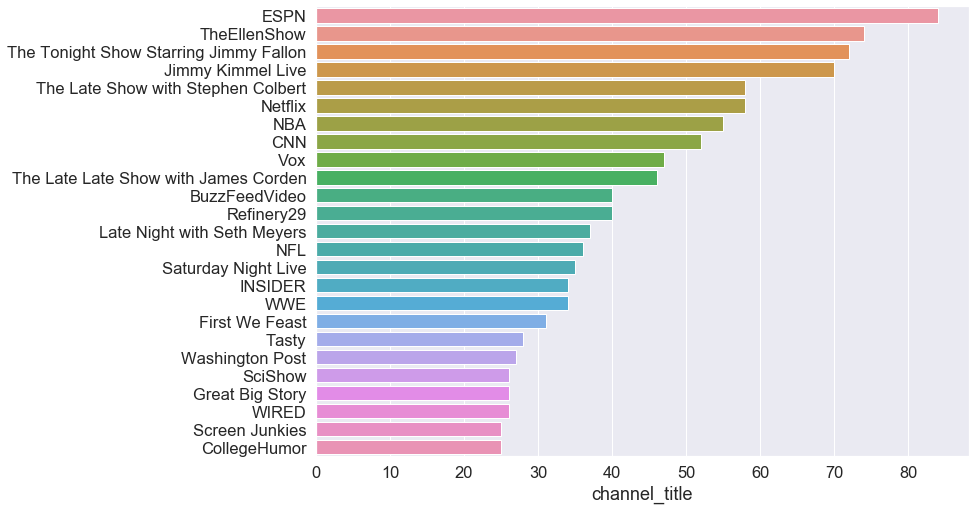

In [21]:
# most re-occuring videos in trending
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = us.channel_title.value_counts()[:25]
_ = sns.barplot(y=tmp.index,x=tmp)

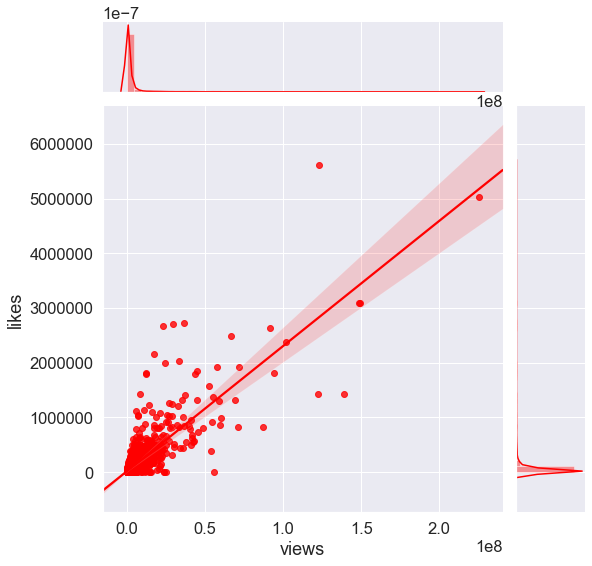

In [22]:
sns.jointplot(x='views', y='likes', 
              data=us, color ='red', kind ='reg', 
              height = 8.0)
plt.show()

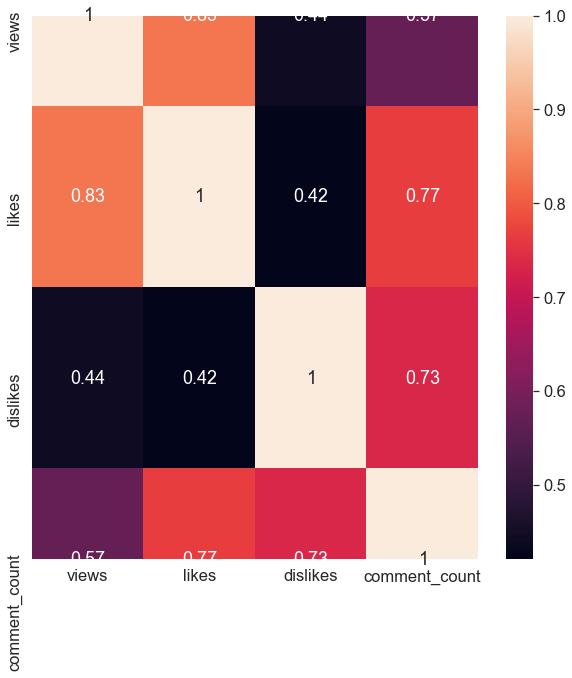

In [23]:
plt.figure(figsize = (10,10))
us.describe()
sns.heatmap(us[["views", "likes","dislikes","comment_count"]].corr(), annot=True)
plt.show()